# Нейронні мережі. Deep Learning. Класифікація. Кредитний скоринг

Курс: "Математичне моделювання в R"

---

In [1]:
Sys.setlocale("LC_CTYPE", "ukrainian") 
options(warn = -1)

[1] "Ukrainian_Ukraine.1251"

## Набір даних

Джерело: <https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling>.

Завантажимо файли з даними:

In [2]:
customers <- read.csv("data/customers.csv")
products <- read.csv("data/products.csv")
cards <- read.csv("data/cards.csv")

Цей датасет містить такі стовпці:

- [x] `RowNumber` - номер рядка.
- [x] `CustomerId` - ідентифікатор клієнта.
- [x] `Surname` - прізвище клієнта.
- [x] `CreditScore` - кредитний рейтинг клієнта.
- [x] `Geography` - регіон.
- [x] `Gender` - стать.
- [x] `Age` - вік.
- [x] `Tenure` - час обслуговування цього клієнта в банку.
- [x] `IsActiveMember` - активний клієнт, виконує операції.
- [x] `EstimatedSalary` - заробітна плата.
- [x] `Exited` - залишив/не залишив банк.

Інформація про клієнтів:

In [3]:
str(customers)

'data.frame':	10000 obs. of  11 variables:
 $ RowNumber      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ CustomerId     : int  15634602 15647311 15619304 15701354 15737888 15574012 15592531 15656148 15792365 15592389 ...
 $ Surname        : chr  "Hargrave" "Hill" "Onio" "Boni" ...
 $ CreditScore    : int  619 608 502 699 850 645 822 376 501 684 ...
 $ Geography      : chr  "France" "Spain" "France" "France" ...
 $ Gender         : chr  "Female" "Female" "Female" "Female" ...
 $ Age            : int  42 41 42 39 43 44 50 29 44 27 ...
 $ Tenure         : int  2 1 8 1 2 8 7 4 4 2 ...
 $ IsActiveMember : int  1 1 0 0 1 0 1 0 1 1 ...
 $ EstimatedSalary: num  101349 112543 113932 93827 79084 ...
 $ Exited         : int  1 0 1 0 0 1 0 1 0 0 ...


In [4]:
head(customers)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,IsActiveMember,EstimatedSalary,Exited
,<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>
1,1,15634602,Hargrave,619,France,Female,42,2,1,101348.88,1
2,2,15647311,Hill,608,Spain,Female,41,1,1,112542.58,0
3,3,15619304,Onio,502,France,Female,42,8,0,113931.57,1
4,4,15701354,Boni,699,France,Female,39,1,0,93826.63,0
5,5,15737888,Mitchell,850,Spain,Female,43,2,1,79084.10,0
6,6,15574012,Chu,645,Spain,Male,44,8,0,149756.71,1


## Оглядовий аналіз даних

### Таблиця `customers`

Оглянемо дані колекції `customers` візуально та за допомогою крос-таблиць:

In [5]:
library(gmodels)
library(ggplot2)

Кредитний рейтинг (`CreditScore`):

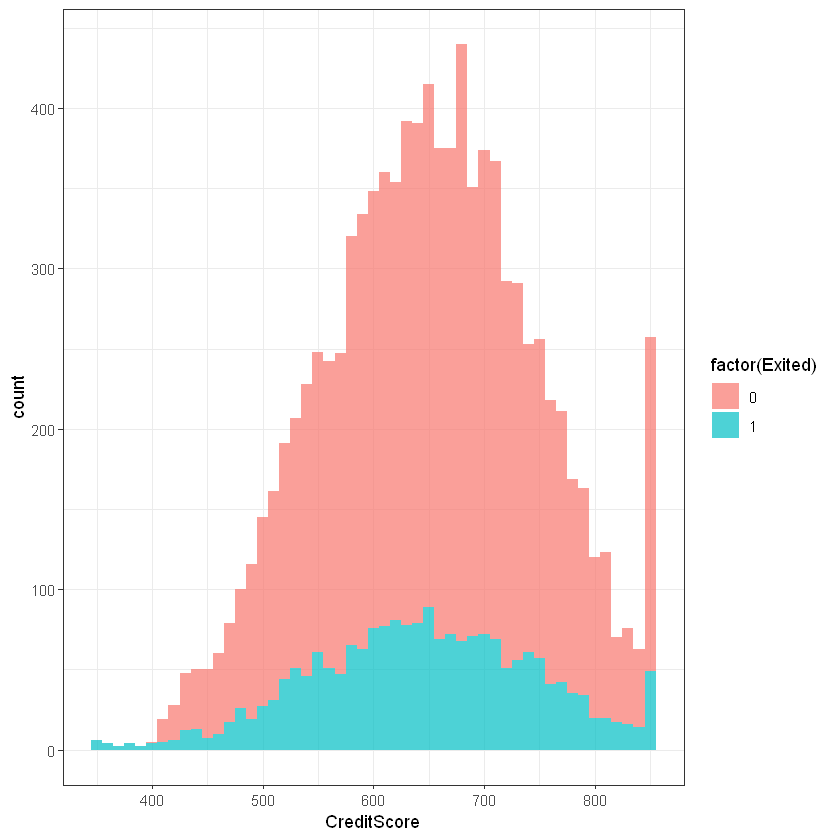

In [6]:
ggplot(customers, aes(x=CreditScore, fill=factor(Exited))) + 
  geom_histogram(binwidth = 10, alpha=0.7) + theme_bw() 

Регіон/країна (`Geography`):

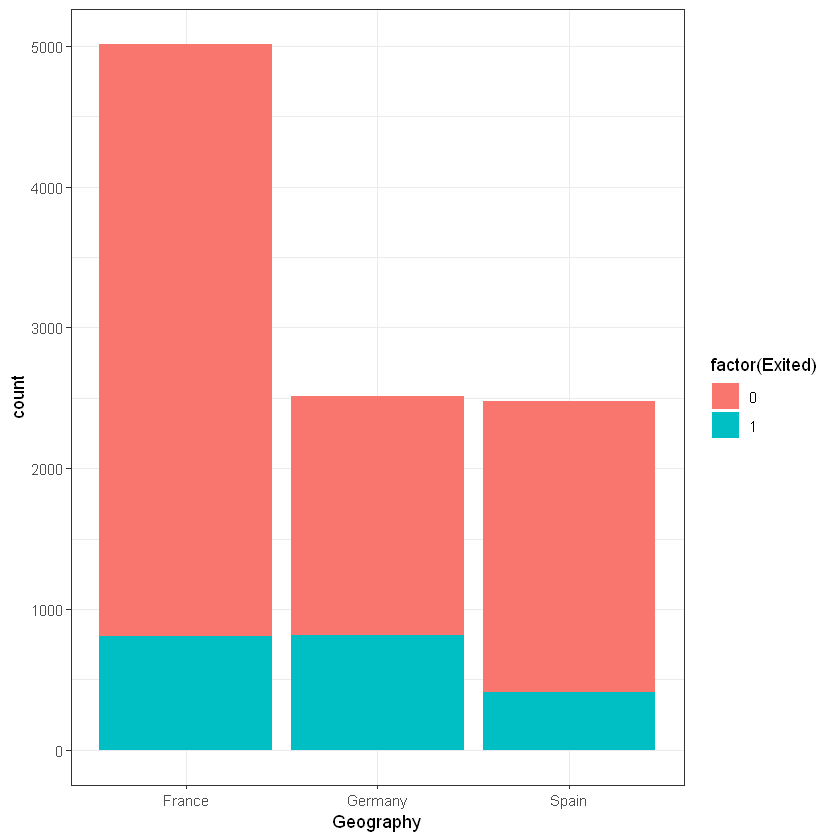

In [7]:
ggplot(customers, aes(x=Geography, fill=factor(Exited))) + 
  geom_bar(position = "stack") + theme_bw()

In [8]:
CrossTable(customers$Geography, customers$Exited)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  10000 

 
                    | customers$Exited 
customers$Geography |         0 |         1 | Row Total | 
--------------------|-----------|-----------|-----------|
             France |      4204 |       810 |      5014 | 
                    |    11.188 |    43.736 |           | 
                    |     0.838 |     0.162 |     0.501 | 
                    |     0.528 |     0.398 |           | 
                    |     0.420 |     0.081 |           | 
--------------------|-----------|-----------|-----------|
            Germany |      1695 |       814 |      2509 | 
                    |    45.927 |   179.537 |           | 
                    |     0.676 |     0.324 |     0.251 | 
                    |     0.213 |     0.400 |         

Стать (`Gender`):

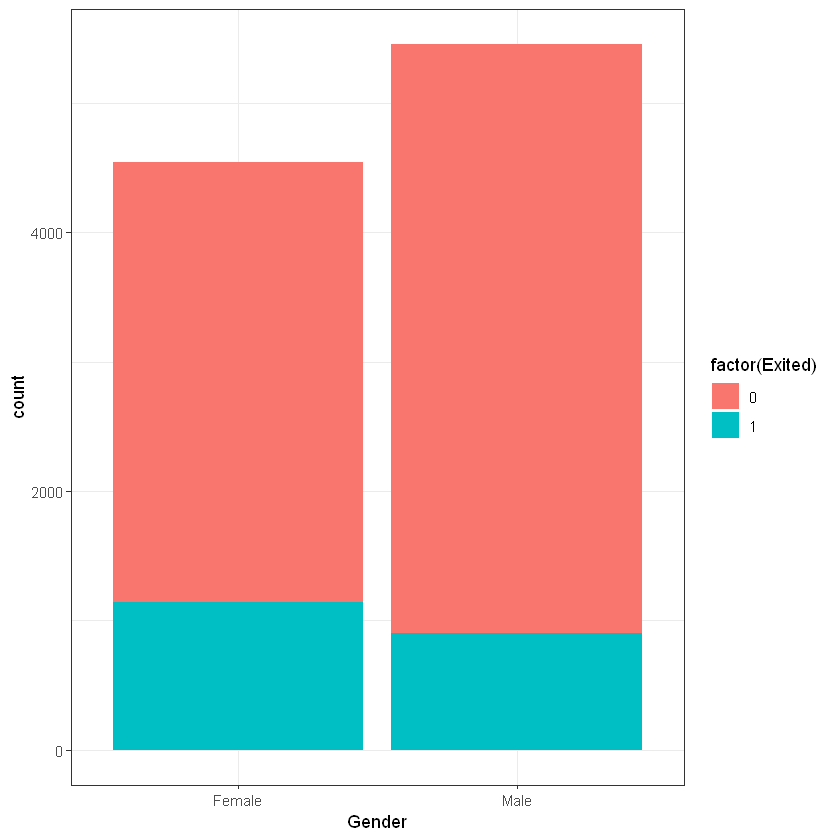

In [9]:
ggplot(customers, aes(x=Gender, fill=factor(Exited))) + 
  geom_bar(position = "stack") + theme_bw()

In [10]:
CrossTable(customers$Gender, customers$Exited)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  10000 

 
                 | customers$Exited 
customers$Gender |         0 |         1 | Row Total | 
-----------------|-----------|-----------|-----------|
          Female |      3404 |      1139 |      4543 | 
                 |    12.611 |    49.298 |           | 
                 |     0.749 |     0.251 |     0.454 | 
                 |     0.427 |     0.559 |           | 
                 |     0.340 |     0.114 |           | 
-----------------|-----------|-----------|-----------|
            Male |      4559 |       898 |      5457 | 
                 |    10.499 |    41.041 |           | 
                 |     0.835 |     0.165 |     0.546 | 
                 |     0.573 |     0.441 |           | 
                 |     0.456 |    

Вік (`Age`):

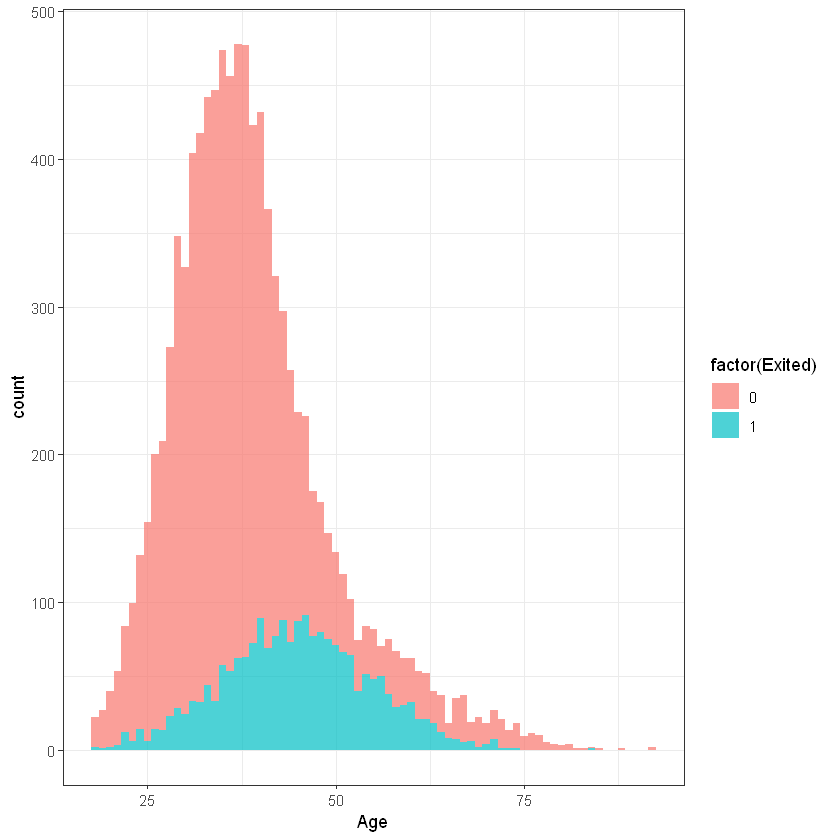

In [11]:
ggplot(customers, aes(x=Age, fill=factor(Exited))) + 
  geom_histogram(binwidth = 1, alpha=0.7) + theme_bw() 

Час обслуговування клієнта (`Tenure`):

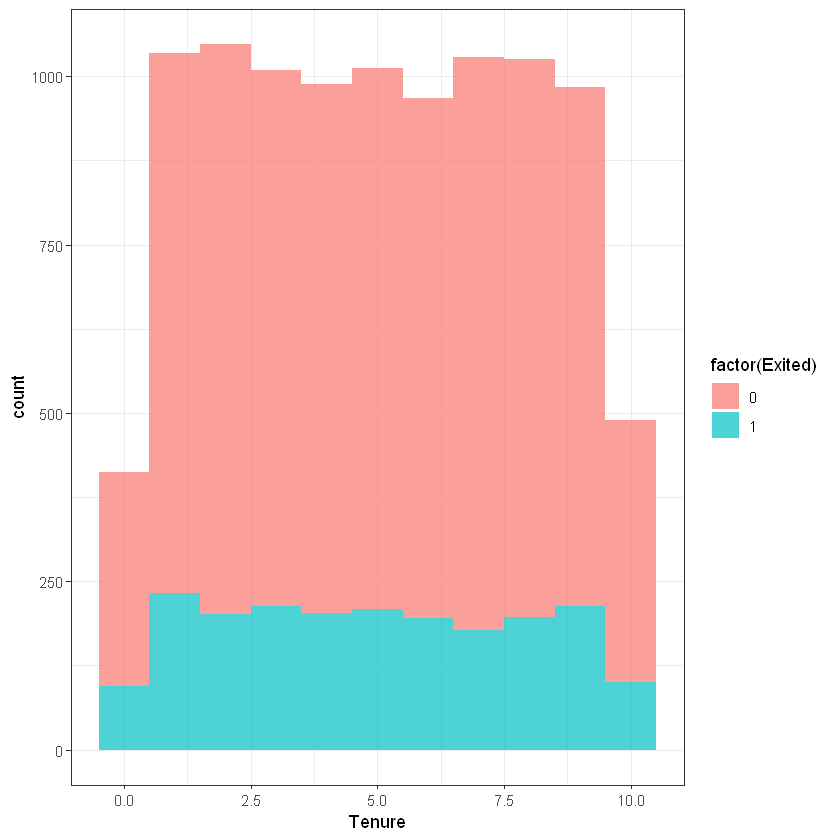

In [12]:
ggplot(customers, aes(x=Tenure, fill=factor(Exited))) + 
  geom_histogram(binwidth = 1, alpha=0.7) + theme_bw() 

Активність (`IsActiveMember`):

In [13]:
CrossTable(customers$IsActiveMember, customers$Exited)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  10000 

 
                         | customers$Exited 
customers$IsActiveMember |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |      3547 |      1302 |      4849 | 
                         |    25.577 |    99.984 |           | 
                         |     0.731 |     0.269 |     0.485 | 
                         |     0.445 |     0.639 |           | 
                         |     0.355 |     0.130 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |      4416 |       735 |      5151 | 
                         |    24.077 |    94.122 |           | 
                         |     0.857 |     0.143 |     0.5

Заробітна плата (`EstimatedSalary`):

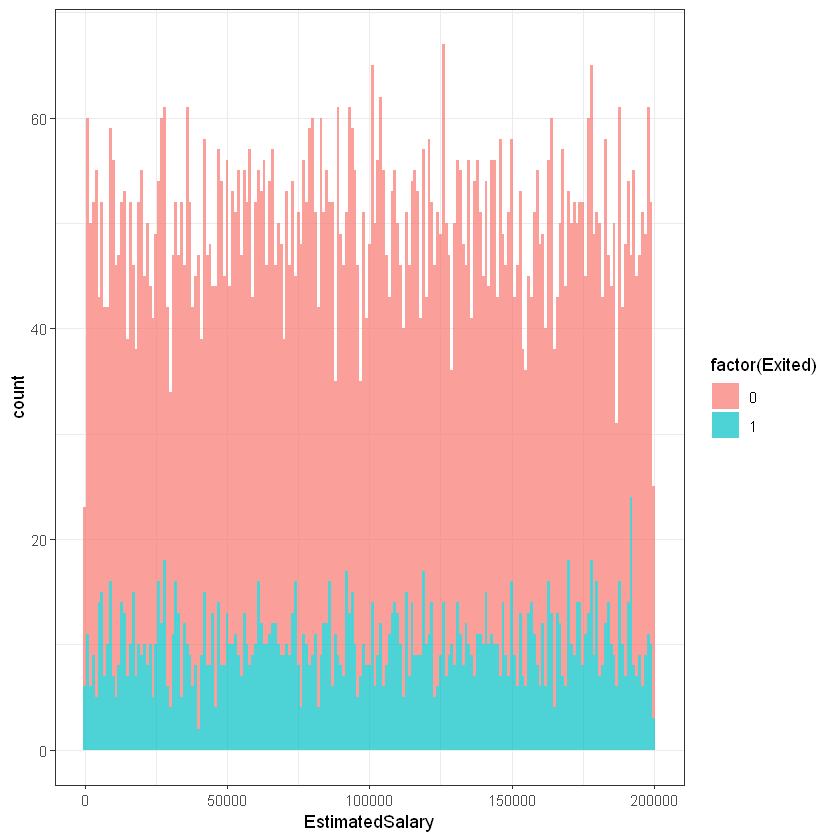

In [14]:
ggplot(customers, aes(x=EstimatedSalary, fill=factor(Exited))) + 
  geom_histogram(binwidth = 1000, alpha=0.7) + theme_bw() 

`Exited`:

In [15]:
CrossTable(customers$Exited)


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  10000 

 
          |         0 |         1 | 
          |-----------|-----------|
          |      7963 |      2037 | 
          |     0.796 |     0.204 | 
          |-----------|-----------|



 


---

### Таблиця `cards`

Інформація про карти клієнта:

In [16]:
str(cards)

'data.frame':	13545 obs. of  4 variables:
 $ CustomerId  : int  15634602 15647311 15647311 15619304 15619304 15701354 15701354 15737888 15737888 15574012 ...
 $ CardNo      : int  684618 357092 802678 888594 987103 507476 928960 370210 935036 581042 ...
 $ IsCreditCard: int  1 0 0 1 0 0 0 1 0 1 ...
 $ Balance     : num  5 41922 41913 79846 79859 ...


In [17]:
head(cards)

,CustomerId,CardNo,IsCreditCard,Balance
,<int>,<int>,<int>,<dbl>
1,15634602,684618,1,5.00
2,15647311,357092,0,41921.93
3,15647311,802678,0,41912.93
4,15619304,888594,1,79846.40
5,15619304,987103,0,79859.40
6,15701354,507476,0,28.00


In [18]:
summary(cards)

   CustomerId           CardNo        IsCreditCard       Balance      
 Min.   :15565701   Min.   :100231   Min.   :0.0000   Min.   :     0  
 1st Qu.:15628272   1st Qu.:323587   1st Qu.:0.0000   1st Qu.:    24  
 Median :15691011   Median :545073   Median :0.0000   Median : 52991  
 Mean   :15690848   Mean   :548414   Mean   :0.4688   Mean   : 51096  
 3rd Qu.:15752816   3rd Qu.:774943   3rd Qu.:1.0000   3rd Qu.: 77276  
 Max.   :15815690   Max.   :999985   Max.   :1.0000   Max.   :221549  

---

### Таблиця `products`

Інформація про продукти клієнта:

In [19]:
str(products)

'data.frame':	13862 obs. of  2 variables:
 $ CustomerId : int  15634602 15647311 15619304 15619304 15619304 15701354 15701354 15737888 15574012 15574012 ...
 $ ProductName: chr  "PROD_1" "PROD_1" "PROD_1" "PROD_2" ...


In [20]:
head(products)

,CustomerId,ProductName
,<int>,<chr>
1,15634602,PROD_1
2,15647311,PROD_1
3,15619304,PROD_1
4,15619304,PROD_2
5,15619304,PROD_3
6,15701354,PROD_1


---

## Feature engeniering

Сформуємо додаткові змінні на основі наявних даних:

- [x] `Balance` - сума по усіх картах клієнат.
- [x] `NumOfProducts` - кількість продуктів банку, які використовує клієнт.
- [x] `HasCreditCard` - dummy-змінна, наявність кредитної карти у клієнта.

### Показник `NumOfProducts`

Варто звернути увагу, що генерувати нові фічі можна із використанням можлиовстей агрегації та фільтрування даних (наприклад, методи пакету `dplyr`) або за допомогою простих алгоритмічних структур (цикли, розгалуження). 

Для `R` використання циклів для подібних задач є не досить хорошим рішенням, адже код виглядає складно і виконується повільно. Проте ми напишемо для требування і пояснення приклади з використанням обох підходів.

Імперативний підхід до програмування:

In [21]:
# Створюємо пусту змінну
customers$NumOfProducts <- c(0)

for(i in 1:nrow(customers))
{
  id <- customers$CustomerId[i]
  prods <- subset(products, CustomerId == id)
  customers$NumOfProducts[i] <- nrow(prods)
}

head(customers, 4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,IsActiveMember,EstimatedSalary,Exited,NumOfProducts
,<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<dbl>
1,1,15634602,Hargrave,619,France,Female,42,2,1,101348.88,1,1
2,2,15647311,Hill,608,Spain,Female,41,1,1,112542.58,0,1
3,3,15619304,Onio,502,France,Female,42,8,0,113931.57,1,3
4,4,15701354,Boni,699,France,Female,39,1,0,93826.63,0,2


Декларативний приклад коду:

In [22]:
library(dplyr)

customers_tmp <- customers |>
    left_join(products |> 
              group_by(CustomerId) |> 
              mutate(NumOfProducts = n()) |>
              select(CustomerId, NumOfProducts) |> distinct(), by = "CustomerId")

head(customers_tmp, 4)

# P.S. Це набагато швидше


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,IsActiveMember,EstimatedSalary,Exited,NumOfProducts.x,NumOfProducts.y
,<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>
1,1,15634602,Hargrave,619,France,Female,42,2,1,101348.88,1,1,1
2,2,15647311,Hill,608,Spain,Female,41,1,1,112542.58,0,1,1
3,3,15619304,Onio,502,France,Female,42,8,0,113931.57,1,3,3
4,4,15701354,Boni,699,France,Female,39,1,0,93826.63,0,2,2


---

### Показник `HasCreditCard`

In [23]:
customers <- customers |>
    left_join(cards |> 
              group_by(CustomerId) |> 
              summarise(HasCreditCard = ifelse(sum(IsCreditCard) == 0, 0, 1)) |>
              select(CustomerId, HasCreditCard) |> distinct(), by = "CustomerId")

head(customers, 4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,IsActiveMember,EstimatedSalary,Exited,NumOfProducts,HasCreditCard
,<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,1,15634602,Hargrave,619,France,Female,42,2,1,101348.88,1,1,1
2,2,15647311,Hill,608,Spain,Female,41,1,1,112542.58,0,1,0
3,3,15619304,Onio,502,France,Female,42,8,0,113931.57,1,3,1
4,4,15701354,Boni,699,France,Female,39,1,0,93826.63,0,2,0


---

### Показник `Balance`

In [24]:
customers <- customers |>
    left_join(cards |> 
              group_by(CustomerId) |> 
              mutate(Balance = round(sum(Balance))) |>
              select(CustomerId, Balance) |> distinct(), by = "CustomerId")

head(customers, 4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,IsActiveMember,EstimatedSalary,Exited,NumOfProducts,HasCreditCard,Balance
,<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,1,15634602,Hargrave,619,France,Female,42,2,1,101348.88,1,1,1,5
2,2,15647311,Hill,608,Spain,Female,41,1,1,112542.58,0,1,0,83835
3,3,15619304,Onio,502,France,Female,42,8,0,113931.57,1,3,1,159706
4,4,15701354,Boni,699,France,Female,39,1,0,93826.63,0,2,0,47


Звичано код можна поєднати в 1 запит.

### Нормалізація даних

Видалимо зайві покзники, що заважатимуть будувати моделі:

In [25]:
customers <- customers |>
    dplyr::select(-c(RowNumber, CustomerId, Surname))

Варто звернути увагу, що інженереія нових фіч завершена не до кінця і у нас ще присутні параметри, що мають нечислові значення `Geography` + `Gender`. Спробуйте замінити їх, наприклад, на `dummy`-змінні або використати `бінінг`.

Для скорочення часу на вивчення матеріали ми скористаємося звичайним приведенням даних до числового типу:

In [26]:
customers$Geography <- as.numeric(as.factor(customers$Geography))
customers$Gender <- as.numeric(as.factor(customers$Gender))

In [27]:
str(customers)

'data.frame':	10000 obs. of  11 variables:
 $ CreditScore    : int  619 608 502 699 850 645 822 376 501 684 ...
 $ Geography      : num  1 3 1 1 3 3 1 2 1 1 ...
 $ Gender         : num  1 1 1 1 1 2 2 1 2 2 ...
 $ Age            : int  42 41 42 39 43 44 50 29 44 27 ...
 $ Tenure         : int  2 1 8 1 2 8 7 4 4 2 ...
 $ IsActiveMember : int  1 1 0 0 1 0 1 0 1 1 ...
 $ EstimatedSalary: num  101349 112543 113932 93827 79084 ...
 $ Exited         : int  1 0 1 0 0 1 0 1 0 0 ...
 $ NumOfProducts  : num  1 1 3 2 1 2 2 4 2 1 ...
 $ HasCreditCard  : num  1 0 1 0 1 1 1 1 0 1 ...
 $ Balance        : num  5 83835 159706 47 125571 ...


Використовуючи функцію `scale()` нормалізуємо дані:

In [28]:
scaled <- scale(customers[-8], center = TRUE)
scaled <- cbind(scaled, customers[8])
head(scaled,)

,CreditScore,Geography,Gender,Age,Tenure,IsActiveMember,EstimatedSalary,NumOfProducts,HasCreditCard,Balance,Exited
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,-0.32620511,-0.9018411,-1.0959327,0.293502747,-1.041708,0.970194,0.0218854,-0.5420116,0.6521559,-1.2240103,1
2,-0.44001395,1.5149916,-1.0959327,0.198153924,-1.387468,0.970194,0.2165229,-0.5420116,-1.5332062,0.1179507,0
3,-1.53671734,-0.9018411,-1.0959327,0.293502747,1.032856,-1.030619,0.2406749,2.2648841,0.6521559,1.3325030,1
4,0.50149556,-0.9018411,-1.0959327,0.007456278,-1.387468,-1.030619,-0.1089125,0.8614363,-1.5332062,-1.2233380,0
5,2.06378057,1.5149916,-1.0959327,0.388851570,-1.041708,0.970194,-0.3652575,-0.5420116,0.6521559,0.7860657,0
6,-0.05720239,1.5149916,0.9123735,0.484200392,1.032856,-1.030619,0.8636071,0.8614363,0.6521559,0.5974260,1


---

## Формування вибірок

Розділимо вибірку на тестову та тренувальну за допомогою пакету `caTools` та функції `sample.split()`:

In [29]:
library(caTools)
set.seed(2022)
split <- sample.split(scaled$Exited, SplitRatio = 0.7)
train_data <- subset(scaled, split == TRUE)
test_data <- subset(scaled, split == FALSE)

---

## Побудова Deep Learning моделі

Викосритаємо можливості пакету `h2o` для побудови моделі на основі `deep learning`. Підключимо пакет.

In [30]:
# install.packages("h2o")

In [31]:
library(h2o)


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit https://docs.h2o.ai

----------------------------------------------------------------------



Attaching package: 'h2o'


The following objects are masked from 'package:stats':

    cor, sd, var


The following objects are masked from 'package:base':

    %*%, %in%, &&, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc




:::{.callout-warning}

Увага! Для запуску пакету потрібна віртуальна машина `Java` на ПК (`JVM`). Завантажити актуальну версію `Java` можна з сайту <https://www.java.com/en/download/>.

:::

Запустимо двигун `h2o`:

In [32]:
# Увага, це специфічні налаштуваняя для ПК на якому налагоджувався проєкт
Sys.setenv(JAVA_HOME = "C:/Program Files/Java/jdk-19/")
print(Sys.getenv("JAVA_HOME"))

[1] "C:/Program Files/Java/jdk-19/"


In [33]:
h2o.init()


H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    D:\Temp\RtmpOYzQ2d\file30182abb672c/h2o_yura_started_from_r.out
    D:\Temp\RtmpOYzQ2d\file3018cb93ee9/h2o_yura_started_from_r.err


Starting H2O JVM and connecting:  Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         3 seconds 419 milliseconds 
    H2O cluster timezone:       Europe/Kiev 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.38.0.1 
    H2O cluster version age:    13 days  
    H2O cluster name:           H2O_started_from_R_yura_svm422 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   3.95 GB 
    H2O cluster total cores:    8 
    H2O cluster allowed cores:  8 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    R Version:                  R v

Побудуємо математичну модель:

In [34]:
h2o_model <- h2o.deeplearning(y = 'Exited', 
                              training_frame = as.h2o(train_data),
                              activation = "Rectifier",
                              hidden = c(6,6),
                              epochs = 100)

  |======================================================================| 100%
  |======================================================================| 100%


Варто перегляднути набір параметрів, що може приймати функція `h2o.deeplearning()`, адже вона досить складна:

In [35]:
help(h2o.deeplearning)

h2o.deeplearning {h2o},R Documentation
x,"(Optional) A vector containing the names or indices of the predictor variables to use in building the model. If x is missing, then all columns except y are used."
y,"The name or column index of the response variable in the data. The response must be either a numeric or a categorical/factor variable. If the response is numeric, then a regression model will be trained, otherwise it will train a classification model."
training_frame,Id of the training data frame.
model_id,Destination id for this model; auto-generated if not specified.
validation_frame,Id of the validation data frame.
nfolds,Number of folds for K-fold cross-validation (0 to disable or >= 2). Defaults to 0.
keep_cross_validation_models,Logical. Whether to keep the cross-validation models. Defaults to TRUE.
keep_cross_validation_predictions,Logical. Whether to keep the predictions of the cross-validation models. Defaults to FALSE.
keep_cross_validation_fold_assignment,Logical. Whether to keep the cross-validation fold assignment. Defaults to FALSE.
fold_assignment,"Cross-validation fold assignment scheme, if fold_column is not specified. The 'Stratified' option will stratify the folds based on the response variable, for classification problems. Must be one of: ""AUTO"", ""Random"", ""Modulo"", ""Stratified"". Defaults to AUTO."


Здійснимо прогноз на тестовій вибірці (`h2o.predict()`), а також класифікуємо значення за `cutOff = 0.5`:

In [36]:
h2o_predict_prob <- h2o.predict(h2o_model, newdata = as.h2o(test_data[-(ncol(test_data))]))

  |======================================================================| 100%
  |======================================================================| 100%


In [37]:
h2o_predict_class <- ifelse(h2o_predict_prob > 0.5, 1 , 0)
h2o_predict_class <- as.vector(h2o_predict_class)

Побудуємо матрицю Confusion Matrix:

In [38]:
library(caret)
caret::confusionMatrix(factor(test_data$Exited), factor(h2o_predict_class), positive = "1")

Loading required package: lattice



Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2282  107
         1  329  282
                                          
               Accuracy : 0.8547          
                 95% CI : (0.8415, 0.8671)
    No Information Rate : 0.8703          
    P-Value [Acc > NIR] : 0.9945          
                                          
                  Kappa : 0.4819          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.7249          
            Specificity : 0.8740          
         Pos Pred Value : 0.4615          
         Neg Pred Value : 0.9552          
             Prevalence : 0.1297          
         Detection Rate : 0.0940          
   Detection Prevalence : 0.2037          
      Balanced Accuracy : 0.7995          
                                          
       'Positive' Class : 1               
                        

Побудуємо `ROC`-криву:


Attaching package: 'InformationValue'


The following objects are masked from 'package:caret':

    confusionMatrix, precision, sensitivity, specificity




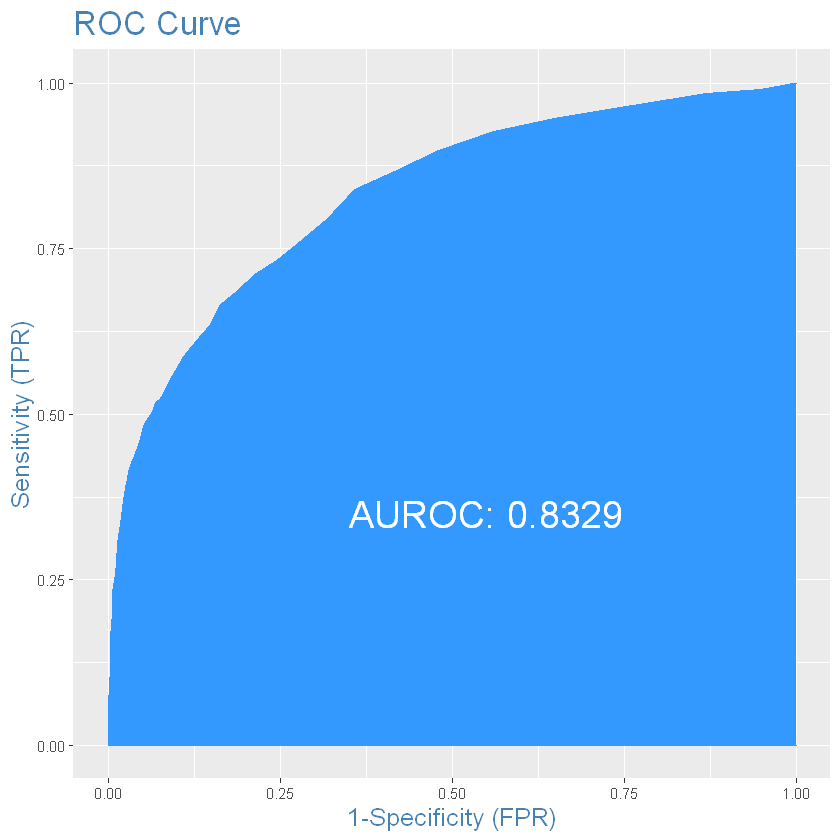

In [39]:
library(InformationValue)
InformationValue::plotROC(test_data$Exited, as.vector(h2o_predict_prob))

Побудуємо модель з більшою кількістю прихованих шарів та нейронів:

In [40]:
h2o_model2 <- h2o.deeplearning(y = 'Exited', 
                              training_frame = as.h2o(train_data),
                              activation = "Rectifier",
                              hidden = c(10,10),
                              epochs = 100)

  |======================================================================| 100%
  |======================================================================| 100%


Здійснимо прогноз:

In [41]:
h2o_predict_prob2 <- h2o.predict(h2o_model2, newdata = as.h2o(test_data[-(ncol(test_data))]))

  |======================================================================| 100%
  |======================================================================| 100%


In [42]:
h2o_predict_class2 <- ifelse(h2o_predict_prob2 > 0.5, 1 , 0)
h2o_predict_class2 <- as.vector(h2o_predict_class2)

Confiusion Matrix:

In [43]:
caret::confusionMatrix(factor(test_data$Exited), factor(h2o_predict_class2), positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2252  137
         1  310  301
                                          
               Accuracy : 0.851           
                 95% CI : (0.8377, 0.8636)
    No Information Rate : 0.854           
    P-Value [Acc > NIR] : 0.69            
                                          
                  Kappa : 0.4866          
                                          
 Mcnemar's Test P-Value : 4.108e-16       
                                          
            Sensitivity : 0.6872          
            Specificity : 0.8790          
         Pos Pred Value : 0.4926          
         Neg Pred Value : 0.9427          
             Prevalence : 0.1460          
         Detection Rate : 0.1003          
   Detection Prevalence : 0.2037          
      Balanced Accuracy : 0.7831          
                                          
       'Positive' Class : 1               
                        

`ROC`-крива:

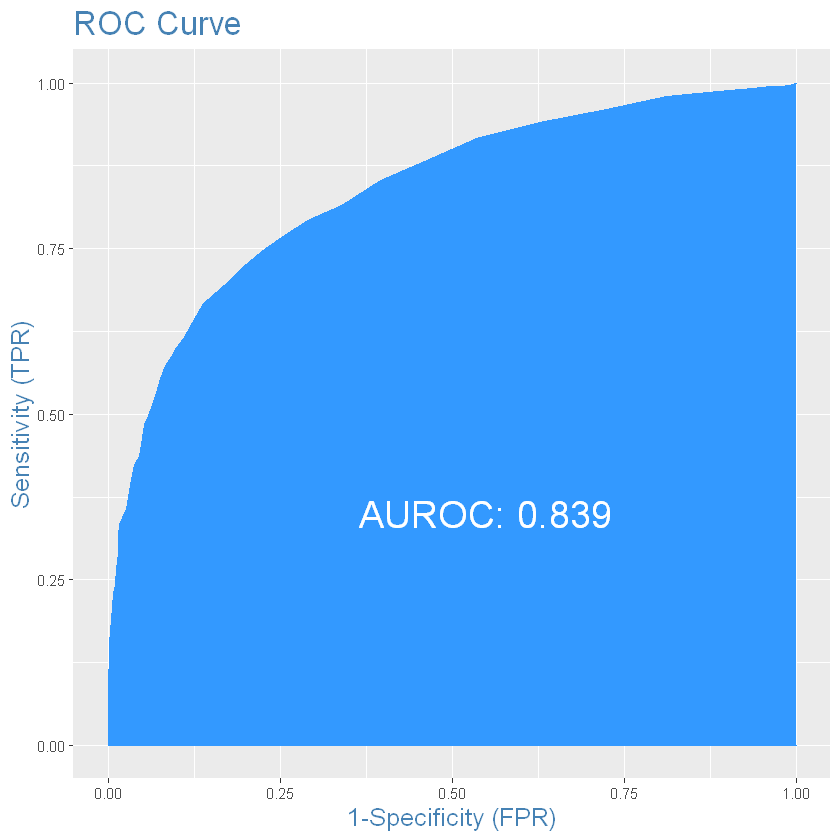

In [44]:
InformationValue::plotROC(test_data$Exited, as.vector(h2o_predict_prob2))

Зупинимо двигун `h2o`:

In [45]:
h2o.shutdown(prompt = F)

---